<a href="https://colab.research.google.com/github/JDGA1997/Grupo-7_PP1/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OBJETIVO: PREDICCIONES DE VENTAS ANUALES POR PAIS

IMPORTACIONES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

from google.colab import files

import io
from IPython.display import clear_output
clear_output()

A PARTIR DE UN ARCHIVO CSV SE CREA EL DATA FRAME df PARA TRABAJAR CON LOS DATOS

In [ ]:
data = 'https://raw.githubusercontent.com/JDGA1997/Grupo-7_PP1/main/ventas_electronica.csv'

# Intenta leer el archivo CSV usando diferentes codificaciones
try:
    df = pd.read_csv(data, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(data, encoding='latin1')  # Intenta con codificación 'latin1' si falla con 'utf-8'

In [ ]:

# Muestra el DataFrame

df

OBTENEMOS CANTIDAD DE FILAS

In [ ]:
df.head

CINCO PRIMERAS FILAS

In [ ]:
df.head()

5 ULTIMAS FILAS

In [ ]:
df.tail()

VERIFICAMOS QUE NO HAYA DUPLICADOS

In [ ]:
# Verifica si hay filas duplicadas
duplicados = df[df.duplicated()]

if duplicados.empty:
    print("No hay filas duplicadas en el DataFrame.")
else:
    print("Las siguientes filas están duplicadas:")
    print(duplicados)

No hay filas duplicadas en el DataFrame.


VERIFICAMOS QUE NO HAYA VACIOS

In [ ]:

# Verifica si hay valores vacíos en todo el DataFrame
hay_vacios = df.isna().any().any()

if hay_vacios:
    print("El DataFrame contiene valores vacíos.")
else:
    print("El DataFrame no contiene valores vacíos.")

El DataFrame contiene valores vacíos.


OBTENEMOS ESTADISTICA DESCRIPTIVA SOBRE LAS COLUMNAS NÙMERICAS DEL CONJUNTO DE DATOS

In [ ]:
df.describe()

OBTENEMOS INFORMACIÒN GENERAL DE DATAFRAME:NÙMERO DE FILAS, COLUMNAS, TIPOS DE DATOS Y SI HAY VALORES NULOS.

In [ ]:
df.info()

In [ ]:

df.info()


TOMAMOS LA COLUMNA ORDERDATE LA CUAL ERA DE TIPO OBJECT Y APARTIR DE ESTA CREAMOS 3 COLUMNAS: DIA, MES, AÑO. A ESTA ULTIMA LA PASAMOS A TIPO DATATIME POR SI QUEREMOS HACER CALCULOS POR FECHAS ANUALES.

In [ ]:

df[['dia', 'mes', 'anio']] = df['OrderDate'].str.split('/', expand=True)
df['dia'] = pd.to_numeric(df['dia'])
df['mes'] = pd.to_numeric(df['mes'])
df['anio'] = pd.to_datetime(df['anio'], format='%Y') + pd.DateOffset(years=1)


# Extrae el año de las columnas "inicio_campaña" y "fin_campaña"
df['anio'] = df['anio'].dt.year



EJECUTAMOS EL DF PARA VER COMO QUEDARON LOS DATOS LUEGO DE LAS ADAPTACIONES

In [ ]:
df.head()



---



In [ ]:
# Ver las primeras filas del DataFrame
print("Primeras 5 filas del DataFrame:")
print(df.head())

In [ ]:
# Estadísticas descriptivas para las columnas numéricas
print("\nEstadísticas descriptivas para columnas numéricas:")
print(df.describe())

In [ ]:
# Conteo de valores únicos para las columnas categóricas
print("\nConteo de valores únicos para columnas categóricas:")
print(df.select_dtypes(include=['object']).nunique())

In [ ]:
# Gráfico de barras para algunas columnas categóricas
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=df)
plt.title('Distribución de Ventas por País')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df)
plt.title('Distribución de Ventas por Categoría')
plt.xticks(rotation=45)
plt.show()

CALCULAMOS VARIACION DE LOS COSTOS EN LOS DIFERENTES PAISES TRASCURRIDOS LOS AÑOS

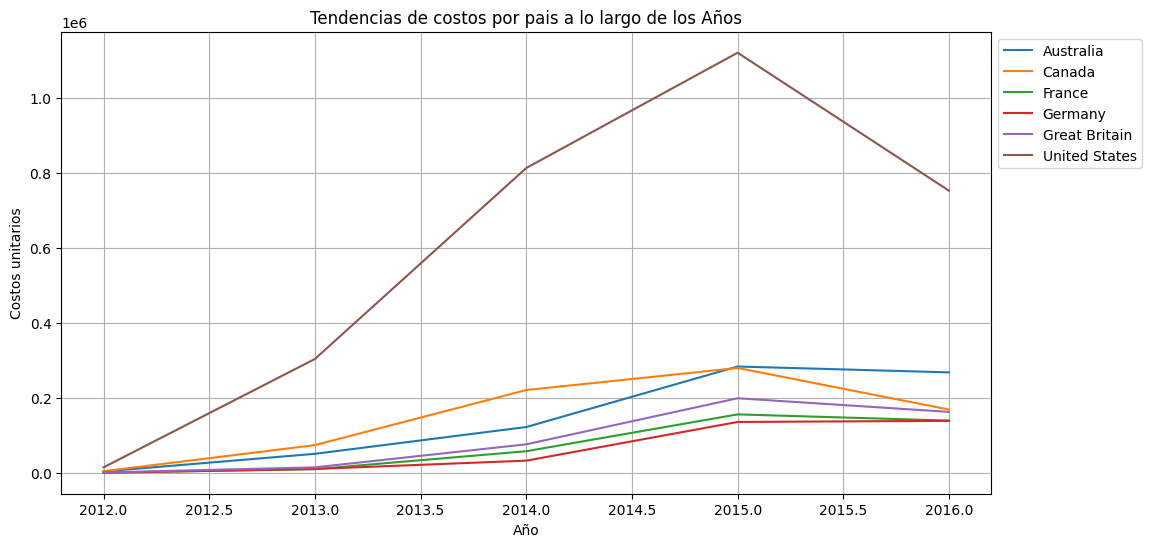

In [ ]:
# Filtrar filas con años válidos y eliminar las que no cumplen el formato
df = df[df['anio'].notnull()]

# Calcular los costos totales por año y pais
tendencias = df.groupby(['anio', 'Country'])['Unit Cost'].sum().reset_index()

# Visualizar tendencias a lo largo de los años
plt.figure(figsize=(12, 6))
for Country in tendencias['Country'].unique():
    data = tendencias[tendencias['Country'] == Country]
    plt.plot(data['anio'], data['Unit Cost'], label=Country)

plt.xlabel('Año')
plt.ylabel('Costos unitarios')
plt.title('Tendencias de costos por pais a lo largo de los Años')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

AGREGAMOS UN GRAFICO DE DISPERSION

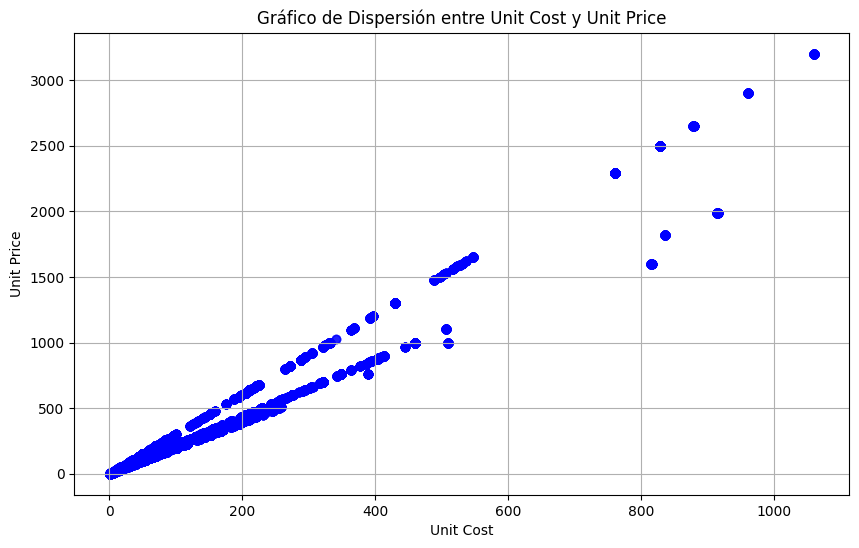

In [ ]:
# Elegir las dos columnas numéricas que deseas comparar
columna_x = 'Unit Cost'
columna_y = 'Unit Price'

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df[columna_x], df[columna_y], alpha=0.5, color='blue')
plt.title(f'Gráfico de Dispersión entre {columna_x} y {columna_y}')
plt.xlabel(columna_x)
plt.ylabel(columna_y)
plt.grid(True)
plt.show()

HACEMOS LA REGRESION LINEAL UTILIZANDO LOS MISMAS COLUMNAS

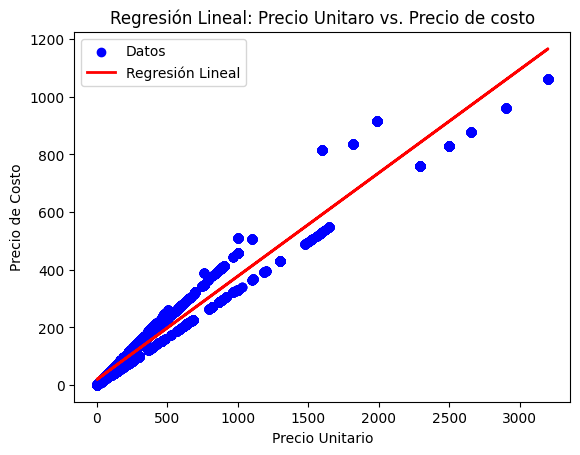

Coeficiente de la pendiente: 0.35826735302075685
Intercepto: 19.184032347946072


In [ ]:
from sklearn.linear_model import LinearRegression
# Seleccionar la variable independiente (Unit Price) y la variable dependiente (Unit Cost)
X = df['Unit Price'].values.reshape(-1, 1)
y = df['Unit Cost'].values

# Crear un modelo de regresión lineal
modelo_regresion = LinearRegression()

# Ajustar el modelo a los datos
modelo_regresion.fit(X, y)

# Hacer predicciones
y_pred = modelo_regresion.predict(X)

# Visualizar los resultados
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regresión Lineal')
plt.xlabel('Precio Unitario')
plt.ylabel('Precio de Costo')
plt.title('Regresión Lineal: Precio Unitaro vs. Precio de costo')
plt.legend()
plt.show()

# Imprimir los coeficientes de la regresión
print("Coeficiente de la pendiente:", modelo_regresion.coef_[0])
print("Intercepto:", modelo_regresion.intercept_)

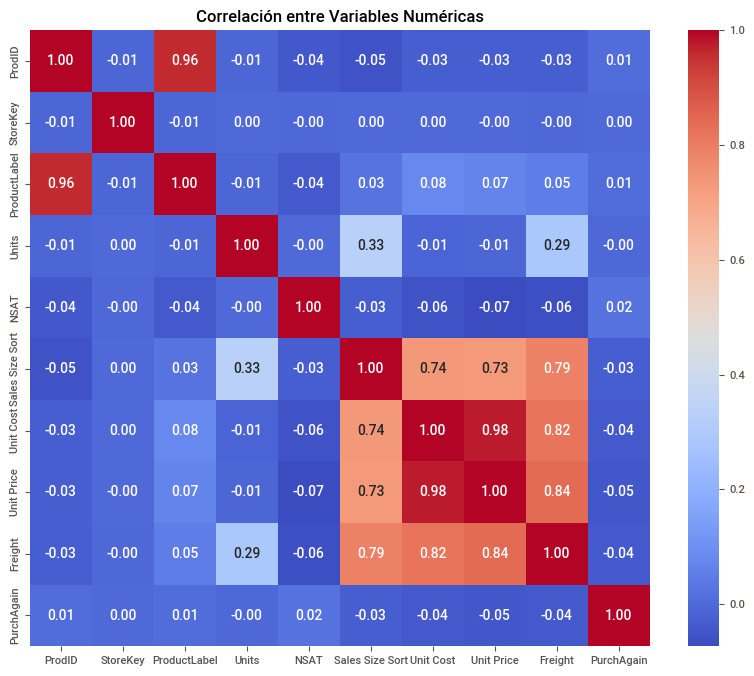

In [ ]:

# Correlación entre las columnas numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Variables Numéricas')
plt.show()
